In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.impute import SimpleImputer
from sklearn import preprocessing

In [2]:
train_master_data = pd.read_csv('train.csv')

In [3]:
train = train_master_data.copy()

In [4]:
print("Number of rows {} and columns {} in Train dataset" .format(train.shape[0], train.shape[1]))

Number of rows 164309 and columns 14 in Train dataset
Number of rows 164309 and columns 14 in Test dataset


In [5]:
train.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [6]:
test.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [6]:
X = train.drop(['Loan_ID', 'Interest_Rate'], axis=1).values
y = train['Interest_Rate'].values.astype(np.int8)
target_names = np.unique(y)
print('\nThere are %d unique target valuess in this dataset:' % (len(target_names)), target_names)


There are 3 unique target valuess in this dataset: [1 2 3]


In [7]:
# Check null values in dataset
print("Number of missing values in percentage: \n")
print(round((train.isnull().mean())*100, 2))

Number of missing values in percentage: 

Loan_ID                     0.00
Loan_Amount_Requested       0.00
Length_Employed             4.49
Home_Owner                 15.43
Annual_Income              15.28
Income_Verified             0.00
Purpose_Of_Loan             0.00
Debt_To_Income              0.00
Inquiries_Last_6Mo          0.00
Months_Since_Deliquency    53.79
Number_Open_Accounts        0.00
Total_Accounts              0.00
Gender                      0.00
Interest_Rate               0.00
dtype: float64


Months_Since_Deliquency has more than 50% missing values. So, we can think of dropping the feature.

We need to impute missing vals in Home_Owner and Annual_Income features and Length_Employed.

In [8]:
print("Number of unique values in each feature: \n")
print(train.nunique())

Number of unique values in each feature: 

Loan_ID                    164309
Loan_Amount_Requested        1290
Length_Employed                11
Home_Owner                      5
Annual_Income               12305
Income_Verified                 3
Purpose_Of_Loan                14
Debt_To_Income               3953
Inquiries_Last_6Mo              9
Months_Since_Deliquency       122
Number_Open_Accounts           58
Total_Accounts                100
Gender                          2
Interest_Rate                   3
dtype: int64


In [9]:
print("Distribution of Target classes:\n",train['Interest_Rate'].value_counts())

print("\nPercenatge of values: \n",round((train['Interest_Rate'].value_counts()/train.shape[0])*100, 2))

Distribution of Target classes:
 2    70580
3    59923
1    33806
Name: Interest_Rate, dtype: int64

Percenatge of values: 
 2    42.96
3    36.47
1    20.57
Name: Interest_Rate, dtype: float64


In [10]:
train.describe()

,Loan_ID,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
count,1.643090e+05,1.392070e+05,164309.000000,164309.000000,75930.000000,164309.000000,164309.000000,164309.000000
mean,1.008216e+07,7.333116e+04,17.207189,0.781698,34.229356,11.193818,25.067665,2.158951
std,4.743207e+04,6.037750e+04,7.845083,1.034747,21.761180,4.991813,11.583067,0.738364
min,1.000000e+07,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,1.004108e+07,4.500000e+04,11.370000,0.000000,16.000000,8.000000,17.000000,2.000000
50%,1.008216e+07,6.300000e+04,16.840000,0.000000,31.000000,10.000000,23.000000,2.000000
75%,1.012323e+07,8.869750e+04,22.780000,1.000000,50.000000,14.000000,32.000000,3.000000
max,1.016431e+07,7.500000e+06,39.990000,8.000000,180.000000,76.000000,156.000000,3.000000


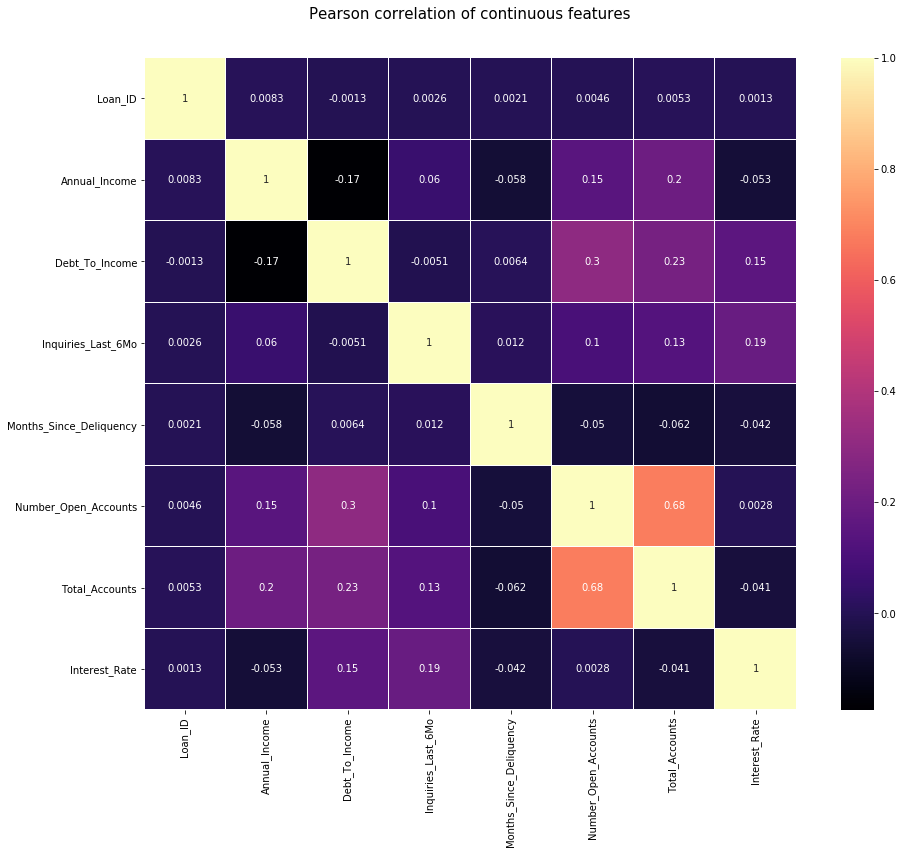

In [11]:
colormap = plt.cm.magma
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(train.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)

From correlation plot, we can see features display very less correlation.

In [12]:
train['Annual_Income'].describe()

count    1.392070e+05
mean     7.333116e+04
std      6.037750e+04
min      4.000000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.869750e+04
max      7.500000e+06
Name: Annual_Income, dtype: float64

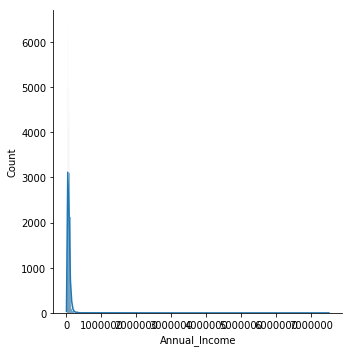

In [13]:
sns.displot(data=train, x="Annual_Income", kde=True)

In above plot, we can see that the distribution of Annual_Income is right skewed. Number of people having very high income is very less. 

In [14]:
train.groupby(['Interest_Rate'])['Annual_Income'].mean()

Interest_Rate
1    81295.256362
2    71179.185595
3    71371.981313
Name: Annual_Income, dtype: float64

People paying interest rate in slab 1, have highest average income.

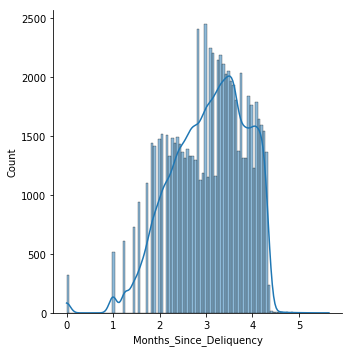

In [15]:
sns.displot(data=train, x=train["Months_Since_Deliquency"].apply(np.cbrt), kde=True)

Months_Since_Deliquency is left skewed.

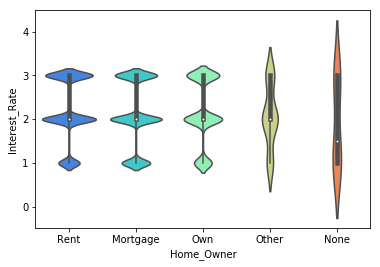

In [16]:
sns.violinplot(x='Home_Owner',y='Interest_Rate',data=train,palette='rainbow')

In [17]:
train[train["Interest_Rate"]==2].describe()

,Loan_ID,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
count,7.058000e+04,5.986000e+04,70580.000000,70580.000000,33746.000000,70580.000000,70580.000000,70580.0
mean,1.008221e+07,7.117919e+04,17.155971,0.703684,34.220648,11.068886,24.771465,2.0
std,4.747153e+04,5.909991e+04,7.767180,0.985527,21.762190,4.922976,11.500848,0.0
min,1.000001e+07,4.000000e+03,0.000000,0.000000,0.000000,1.000000,2.000000,2.0
25%,1.004107e+07,4.450000e+04,11.380000,0.000000,16.000000,8.000000,16.000000,2.0
50%,1.008206e+07,6.000000e+04,16.770000,0.000000,31.000000,10.000000,23.000000,2.0
75%,1.012337e+07,8.500000e+04,22.620000,1.000000,50.000000,14.000000,31.000000,2.0
max,1.016431e+07,7.141778e+06,39.990000,7.000000,180.000000,58.000000,116.000000,2.0


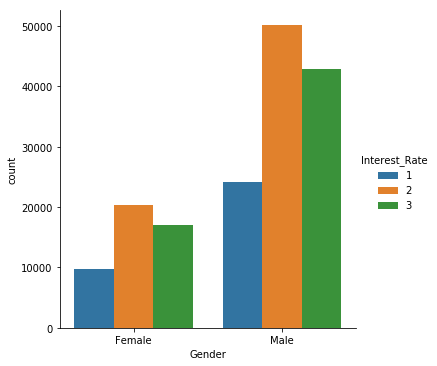

In [18]:
sns.catplot(x="Gender", hue="Interest_Rate", kind="count", data=train)

In [19]:
train['Gender'].value_counts()

Male      117176
Female     47133
Name: Gender, dtype: int64

From the above two figures, We can clearly observe number of male is very high than female in every interest slabs

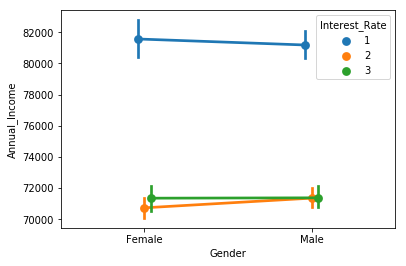

In [20]:
sns.pointplot(x="Gender", y="Annual_Income", hue='Interest_Rate', data=train, dodge=True)

In [21]:
train.groupby(['Gender','Interest_Rate'])['Annual_Income'].mean()

Gender  Interest_Rate
Female  1                81570.743431
        2                70737.007127
        3                71355.472335
Male    1                81184.624831
        2                71358.734586
        3                71378.590194
Name: Annual_Income, dtype: float64

A point plot shows the mean value comparison.

This is an interesting plot, we can observe that both Men and women have more or less same income. Men in interest slab 1 have slightly less than that of womens annual income.

Imputing missing values

In [22]:
def impute_null_val(df, var):
    median = df[var].median()
    df[var] = df[var].fillna(median)

In [23]:
def categorical_plots(data, x):
    sns.countplot(x=x, data=data, edgecolor=sns.color_palette("dark", 3))
    plt.show()

In [24]:
train['Length_Employed'] = train['Length_Employed'].astype(str)

In [25]:
train['Loan_Amount_Requested'] = train['Loan_Amount_Requested'].str.replace(',', '')

train['Loan_Amount_Requested'] = train['Loan_Amount_Requested'].astype(int)

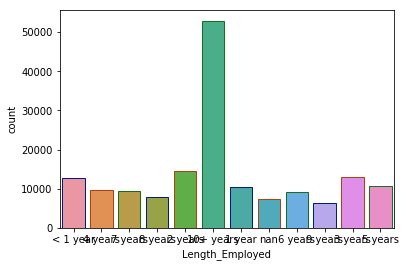

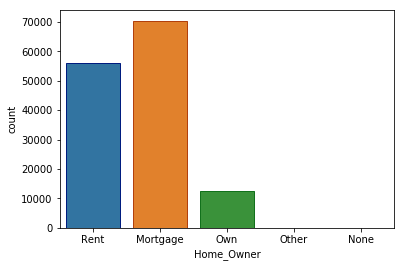

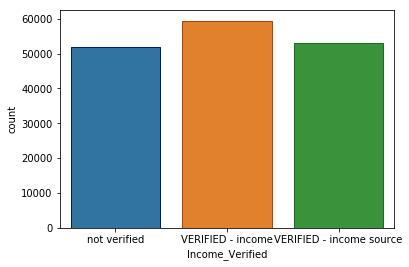

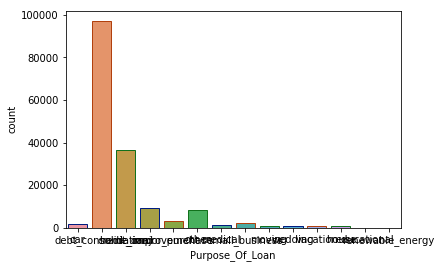

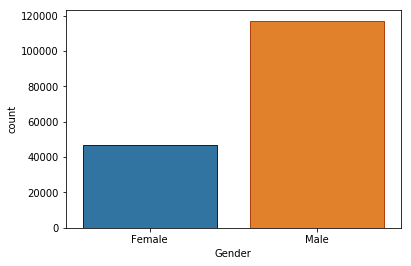

In [26]:
column_object = train.select_dtypes(include=['O']).columns.tolist()
for column in column_object:
    categorical_plots(train, column)

In [27]:
# stopwords = ['years', 'year']

In [28]:
# def remove_special_char(df, var):
#     df[var] = df[var].str.replace('[+,<]', '')

In [29]:
# remove_special_char(train, var='Length_Employed_Converted')

In [30]:
# from tqdm import tqdm
# def clean_data(df, var):
#     clean_data = []
#     for sentance in tqdm(df[var].values):
#         titl = ' '.join(e for e in sentance.split() if e not in stopwords)
#         clean_data.append(titl.lower().strip())
#     return clean_data

In [31]:
# train['Length_Employed_Converted'] = clean_data(train, var='Length_Employed_Converted')

In [32]:
train.drop(['Loan_ID'], axis=1, inplace=True)

In [33]:
train_cp = train.copy()

In [34]:
def simp_imputation(df, var, strategy, **arg):
    if strategy == 'constant':
        fill_value = arg['fill_value']
    else:
        fill_value = None
    imputer = SimpleImputer(missing_values=np.nan, strategy=strategy, fill_value=fill_value)
    imr = imputer.fit(df[[var]])
    df[var] = imr.transform(df[[var]]).ravel()
    
#     return imputed_values

In [35]:
miss_val_columns = train.columns[train.isnull().any()].tolist()
miss_val_columns

['Home_Owner', 'Annual_Income', 'Months_Since_Deliquency']

In [36]:
train_cp2 = train.copy()

In [37]:
for column in miss_val_columns:
    if column == 'Length_Employed_Converted':
        strategy = 'median'
    elif column == 'Annual_Income':
        strategy = 'mean'
    elif column == 'Home_Owner':
        strategy = 'most_frequent'
    else:
        strategy = 'constant'
    simp_imputation(train, column, strategy, fill_value=0)
#     simp_imputation(train_cp1,'Length_Employed_Converted','median')
#     simp_imputation(train_cp1,'Annual_Income','mean')
#     simp_imputation(train_cp1,'Home_Owner','most_frequent')
#     simp_imputation(train_cp1,'Months_Since_Deliquency','constant', fill_value=0)

In [38]:
def label_encoding(df, var):
    label_encoder = preprocessing.LabelEncoder()
    df[var] = label_encoder.fit_transform(df[var])

In [39]:
def vector_categorical(df, var):
    
    vectorizer = CountVectorizer()
    vectorizer.fit(df[var])
    vect_cat = vectorizer.transform(df[var])
    
    return vect_cat

In [40]:
vect_inc = vector_categorical(train, 'Income_Verified')

In [41]:
label_encoding(train, 'Gender')

column_object